# 제목

# module import

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import os
import sys
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import json

# 데이터 가져오기 - 샘플 작성

In [54]:
url = 'http://openapi.tour.go.kr/openapi/service'
url_svc = '/EdrcntTourismStatsService'
url_op = '/getEdrcntTourismStatsList'
# params = 'serviceKey=o4EJOmBnIoliaZ7hRZFIVr4NBjEBURrIeDwRHE9Qj3jqo4K1ZfDkuKHjsOCI%2BpBHRFMkc35YpP94rjF3QussRg%3D%3D&YM=201201&NAT_CD=112&ED_CD=D&'
# params = list(map(lambda i: i.split('='),params.rstrip('&').split('&')))
# params = {k: v for k, v in params}
# api_key = params['serviceKey']
# api_key = requests.utils.unquote(api_key)
yyyymm = '202004'
#중국: 112 / 일본: 130 / 미국: 275
national_code = '112'
ed_cd = 'E'
params = {}
params['_type'] = 'json'
params['serviceKey'] = requests.utils.unquote('o4EJOmBnIoliaZ7hRZFIVr4NBjEBURrIeDwRHE9Qj3jqo4K1ZfDkuKHjsOCI%2BpBHRFMkc35YpP94rjF3QussRg%3D%3D')
params['YM'] = yyyymm
params['NAT_CD'] = national_code
params['ED_CD'] = ed_cd
resp = requests.get(url+url_svc+url_op, params=params)
resp.json()['response']

{'header': {'responseTime': '2020-06-11T15:51:44.035+09:00',
  'resultCode': 30,
  'resultMsg': 'SERVICE KEY IS NOT REGISTERED ERROR.'}}

# 데이터 가져오기 - 함수
## 필요 정보
### 하루 최대 요청 수는 1000회

In [4]:
def get_resp(yyyymm='201201', nat_cd='112', ed_cd='E'):
    url = 'http://openapi.tour.go.kr/openapi/service'
    url_svc = '/EdrcntTourismStatsService'
    url_op = '/getEdrcntTourismStatsList'
    params = {
        '_type': 'json',
        'serviceKey': requests.utils.unquote('vA%2FvXt3OmfgwIKfVMffi7jcAs%2FRrpoSxeD3rBpOk%2FK7JCg1hgjL7NORf7A6REPB6dYxD35veCxGxSc%2FhnXVx8Q%3D%3D'),
        'YM': yyyymm,
        'NAT_CD': nat_cd,
        'ED_CD': ed_cd
    }
    resp = requests.get(url+url_svc+url_op, params=params)
    if resp.status_code == 200:
#         print(f'{datetime.datetime.now()} Url Request Success')
        return resp.json()
    else:
        return None

# 함수 테스트

In [55]:
get_resp(202004,275)

{'response': {'header': {'responseTime': '2020-06-11T15:51:48.379+09:00',
   'resultCode': 22,
   'resultMsg': 'LIMITED NUMBER OF SERVICE REQUESTS EXCEEDS ERROR.'}}}

# 반복문으로 데이터 받아오기(540회)

In [117]:
json_rs = {}
nat_code_dict = {'미국': 275, '중국': 112, '일본': 130}
start_year = 2005
end_year = 2019
for nation, nat_cd in nat_code_dict.items():
    json_rs[nation] = []
    for year in range(start_year, end_year):
        for month in range(1, 13):
            yyyymm = '%4d%02d' % (year,month)
            resp = get_resp(yyyymm,nat_cd)
            if resp['response']['header']['resultMsg'] == 'OK':
                num = resp['response']['body']['items']['item']['num']
                item = {
                    'nation': nation,
                    'nat_cd': nat_cd,
                    'yyyymm': yyyymm,
                    'visit_cnt': num
                }
#                 print(item)
                json_rs[nation].append(item)

# json 파일로 저장

In [8]:
now = '20200611'
fn = '해외방문객정보_%8s.json' % now
with open(fn, 'w', encoding='utf-8') as outfile:
    retJson = json.dumps(json_rs, indent=4, sort_keys=True, ensure_ascii=False)
    outfile.write(retJson)

In [65]:
json_rs = {}
with open('해외방문객정보.json', encoding='UTF-8') as file:
    json_rs = json.loads(file.read())
indexVisit = [i for i in range(len(json_rs))]
indexYear = [i*12 for i in range(int(len(json_rs) / 12))]
visitYM = [''.join(i['yyyymm'][0:4]) for i in json_rs]
cnVisit = [i['visit_cnt'] for i in json_rs]
visitY = list(map(int, set(visitYM)))
visitY.sort()
indexX

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168]

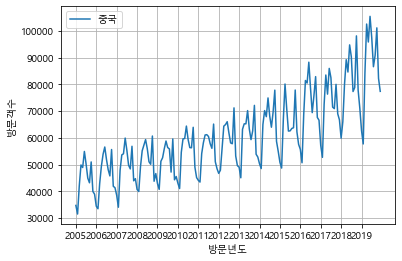

In [75]:
font_location = 'c:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
plt.xticks(indexYear, visitY)
plt.plot(indexVisit, cnVisit, label='중국')
plt.legend(loc=2)
# plt.plot(indexVisit, list(map(lambda i:int(i)+10000,cnVisit)))
plt.xlabel('방문년도')
plt.ylabel('방문객수')
plt.grid(True)
plt.show()